In [12]:
import pandas as  pd
import numpy as np

In [13]:
df = pd.read_csv('..\data\data.csv')

In [14]:
df.columns =[x.lower() for x in df.columns]

In [15]:
df.columns = df.columns.str.replace(' ', '_')

In [16]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\3937611957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


In [17]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['number'])

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df_cat.drop(['customer'],axis=1,inplace=True)

In [20]:
for col in df_cat:
  le = LabelEncoder()
  le.fit(df_cat[col])
  df_cat[col] =le.transform(df_cat[col])
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [21]:
df_final =pd.concat([df_num,df_cat],axis=1)
df_final.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,4,0,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,2,0,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,4,0,...,1,1,0,2,1,3,0,0,0,1


# Model Building

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X =df_final.drop(['customer_lifetime_value','policy_type','policy'],axis=1)
y = df_final['customer_lifetime_value']
y= np.log(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [24]:
# Normalize the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df_num.drop(['customer_lifetime_value'],axis=1).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 19)
(6393,)
(2741, 19)
(2741,)


### Ridge and Lasso Regression

In [36]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [61]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression')

y_pred =ridge.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared:', r2_score(y_test, y_pred))

Ridge Regression
RMSE: 0.5810693749904507
R-Squared: 0.24489967867395568


In [62]:
print(f'R^2 score for train: {ridge.score(X_train, y_train)}')
print(f'R^2 score for test: {ridge.score(X_test, y_test)}')

R^2 score for train: 0.24982613900941597
R^2 score for test: 0.24489967867395568


In [63]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('lasso Repression')

y_pred =lasso.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared:', r2_score(y_test, y_pred))

lasso Repression
RMSE: 0.6687481485521288
R-Squared: -0.0001700993991904376


In [64]:
print(f'R^2 score for train: {lasso.score(X_train, y_train)}')
print(f'R^2 score for test: {lasso.score(X_test, y_test)}')

R^2 score for train: 0.0
R^2 score for test: -0.0001700993991904376


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train, y_train)
print('Decision Tree regressor')

y_pred =dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred) )
print('R-Squared:', r2_score(y_test, y_pred))

Decision Tree regressor
RMSE: 0.2608247112181333
MAE: 0.10264004466283035
R-Squared: 0.8478590400987395


In [66]:
print(f'R^2 score for train: {dt.score(X_train, y_train)}')
print(f'R^2 score for test: {dt.score(X_test, y_test)}')

R^2 score for train: 1.0
R^2 score for test: 0.8478590400987395


### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [86]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [87]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [88]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
# Get the best estimator
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, random_state=42)

In [90]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [91]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")
print(f'R^2 score for train: {best_rf.score(X_train, y_train)}')
print(f'R^2 score for test: {best_rf.score(X_test, y_test)}')

Mean Squared Error: 0.04263869797538896
Root Mean Squared Error: 0.20649139927703758
Mean Absolute Error: 0.10214741362185109
R-Squared: 0.9046429919385026
R^2 score for train: 0.9942136222039916
R^2 score for test: 0.9046429919385026


### Xgboost

In [92]:
import xgboost as xgb

In [93]:
# Define the model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [94]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [95]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [96]:
# Get the best estimator
best_xg_reg = grid_search.best_estimator_
best_xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [97]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")
print(f'R^2 score for train: {best_xg_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {best_xg_reg.score(X_test, y_test)}')

Mean Squared Error: 0.04263869797538896
Root Mean Squared Error: 0.20649139927703758
Mean Absolute Error: 0.10214741362185109
R-Squared: 0.9046429919385026
R^2 score for train: 0.9351585581676248
R^2 score for test: 0.9087044175972299


### Neural Network

In [113]:
import kerastuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from kerastuner.tuners import Hyperband

In [129]:
# Define a function to build the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 5, 20)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])))

    # Add dropout for regularization
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation='linear'))

    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(lr),
                  loss='mse',
                  metrics=['mae'])
    
    return model


In [130]:
# Initialize the tuner
tuner = Hyperband(hypermodel=build_model,
                     objective='val_mae',
                     max_epochs=100,
                     factor=3,
                     directory='..\model\kerastuner_trials',
                     project_name='trials')

In [131]:
# Define a callback to stop training early when a metric has stopped improving
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [132]:
# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

Trial 254 Complete [00h 00m 41s]
val_mae: 0.15533508360385895

Best val_mae So Far: 0.11106796562671661
Total elapsed time: 01h 01m 03s


In [133]:
# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

In [134]:
print("Best Hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")

Best Hyperparameters:
num_layers: 5
units_0: 128
activation: sigmoid
units_1: 384
dropout: 0.0
learning_rate: 0.000585590963829779
units_2: 32
units_3: 96
units_4: 384
units_5: 224
units_6: 416
units_7: 512
units_8: 96
units_9: 480
units_10: 96
units_11: 256
units_12: 64
units_13: 416
units_14: 288
units_15: 320
units_16: 256
units_17: 64
units_18: 448
units_19: 224
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0233


In [135]:
# Print the final model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               2560      
                                                                 
 dense_8 (Dense)             (None, 384)               49536     
                                                                 
 dense_9 (Dense)             (None, 32)                12320     
                                                                 
 dense_10 (Dense)            (None, 96)                3168      
                                                                 
 dense_11 (Dense)            (None, 384)               37248     
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [136]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

Epoch 1/100
160/160 [==============================] - 3s 5ms/step - loss: 4.8064 - mae: 1.2447 - val_loss: 0.4090 - val_mae: 0.5077
Epoch 2/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4203 - mae: 0.5166 - val_loss: 0.4091 - val_mae: 0.5066
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4198 - mae: 0.5165 - val_loss: 0.4181 - val_mae: 0.5199
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4198 - mae: 0.5170 - val_loss: 0.4147 - val_mae: 0.5026
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4106 - mae: 0.5098 - val_loss: 0.3797 - val_mae: 0.4942
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3572 - mae: 0.4722 - val_loss: 0.3219 - val_mae: 0.4461
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3318 - mae: 0.4536 - val_loss: 0.3176 - val_mae: 0.4341
Epoch 8/100
160/160 [==============================] - 1s 4ms/step - 

In [137]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

86/86 [==============================] - 0s 3ms/step - loss: 0.0462 - mae: 0.1184
Mean Absolute Error: 0.11837080121040344


In [140]:
# Predict on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")
print(f'Mae for train: {model.evaluate(X_train, y_train)[1]}')
print(f'Mae for test: {model.evaluate(X_test, y_test)[1]}')

86/86 [==============================] - 0s 2ms/step
Mean Squared Error: 0.04616729039441211
Root Mean Squared Error: 0.2148657497006261
R-Squared: 0.8967516624250934
200/200 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1156
Mae for train: 0.11561408638954163
86/86 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.1184
Mae for test: 0.11837080121040344


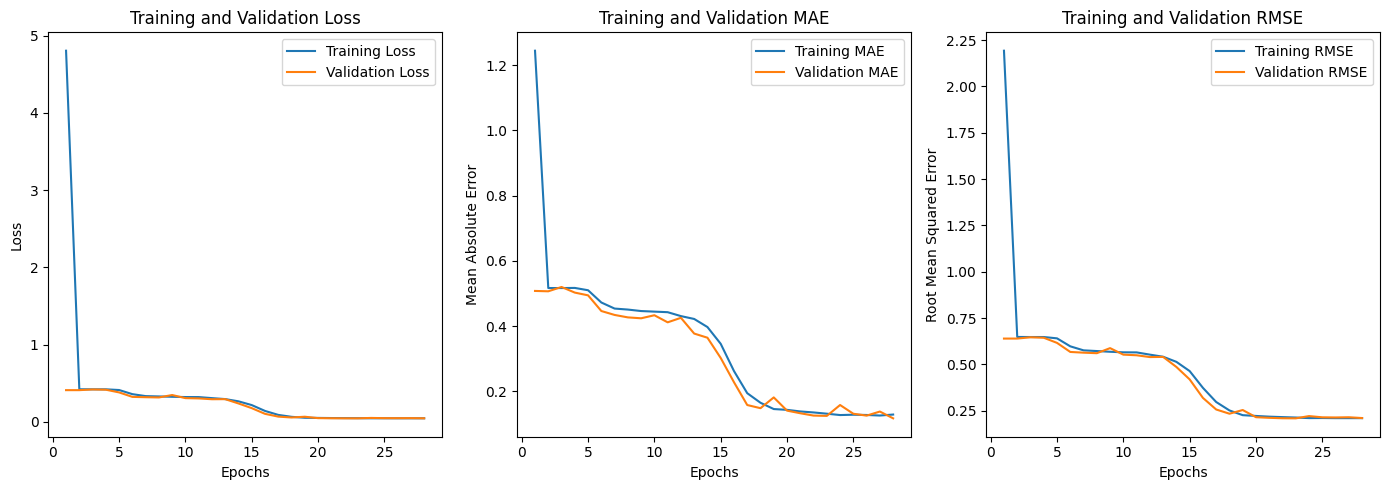

In [139]:
# Plot the evaluation metrics
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, np.sqrt(history.history['loss']), label='Training RMSE')
plt.plot(epochs, np.sqrt(history.history['val_loss']), label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

# Saving Model

In [102]:
import pickle
# save the model to disk
filename = '..\model\\finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\HP\AppData\Local\Temp\ipykernel_17388\2333429045.py:3: SyntaxWarning: invalid escape sequence '\m'
  filename = '..\model\\finalized_model.sav'
